**Assignment 1**

GitHub User Name: lbelmanw

Email: livia_belman-wells@brown.edu

Worked with Angela White and Justin Voelker

In [1]:
# it is good practice to include all import statements in the first code cell at the top of your workbook or script.
import numpy as np
import matplotlib.pyplot as plt

# this is a so called "magic" function that allows for interactive plotting, 
# you will see below when we plot the results
%matplotlib inline

In [2]:
def rk(fnc, dt, x0, t0, tf):
    #Set initial conditions
    tn = t0
    xn = x0
    x_list = [x0]
    t_list = [t0]
    n = int((tf-t0)/dt)
    #Loop through range
    for i in range(n):
        #Find k1,k2,k3,k4
        k1 = dt*fnc(xn,tn)
        k2 = dt*fnc(xn+(.5*k1),tn+(.5*dt))
        k3 = dt*fnc(xn+(.5*k2),tn+(.5*dt))
        k4 = dt*fnc(xn+(.5*k3),tn+dt)
        #Find xn+1
        xn = xn +(1/6)*(k1+2*k2+2*k3+k4)
        tn += dt
        x_list.append(xn)
        t_list.append(tn)
    x_array = np.array(x_list)
    t_array = np.array(t_list)
    return(t_array,x_array)

**Problem 1**

**Part A**

We have three equations:
$$IR = V_{in} - V_{out}$$
$$Q = CV_{out}$$
$$I=\frac{dQ}{dt}$$

Combine equations  1 and 3 to get: $$\frac{dQ}{dt}R=V_{in}-V_{out}$$
Now make a substitution from 2 to find: $$CR\frac{dV_{out}}{dt}=V_{in}-V_{out}$$
So our ODE is: $$\frac{dV_{out}}{dt}=\frac{1}{CR}(V_{in}-V_{out})$$

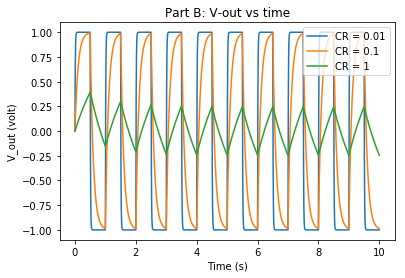

In [59]:
#Part B
CR = 0.01

#ODE fnc
def fnc2(x,t):
    dx = (1/CR)*(((-1)**np.floor(2*(t)))-x)
    return dx

t , v_out = (rk(fnc2, 0.001, 0, 0, 10))
plt.plot(t,v_out, linestyle = '-', label = 'CR = 0.01')
plt.xlabel('Time (s)')
plt.ylabel('V_out (volt)')
plt.title('Part B: V-out vs time')

CR = 0.1
t , v_out = (rk(fnc2, 0.001, 0, 0, 10))
plt.plot(t,v_out, linestyle = '-', label = 'CR = 0.1')

CR = 1
t , v_out = (rk(fnc2, 0.001, 0, 0, 10))
plt.plot(t,v_out, linestyle = '-', label = 'CR = 1')

plt.legend(loc = 1)

**Part C**

As voltage is applied to the circuit charge builds up on the capacitor. We can see that this voltage is building up as we predict V-out which is in parallel with the capacitor. When the current switches (which it does every half period as a square wave) the capacitor discharges temporarily returning to 0 voltage before then building up charge again. The reason that the graph changes as we increase RC is that now the current takes longer to reach the part of the circuit with v-out and the capacior. This means there is not as much time for voltage to build across the capacitor before it is discharged. That is why when RC is small there is a plateau in the graph as v-out can stabalize before the discharge, while there are peaks for large RC as no such stabalization occurs.

**Problem 2**

In [39]:
def fnc3(N,t):
    Na = N[0]
    Nb = N[1]
    dNa = -Na/Ta
    dNb = Na/Ta - Nb/Tb
    return np.array([dNa,dNb], float)

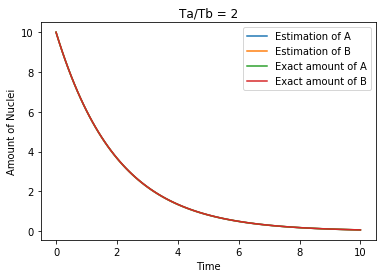

In [58]:
Ta = 2
Tb = 1

t_decay, N_array = rk(fnc3, 0.1, np.array([Na0,Nb0], float), 0, 10)

Na = []
Nb = []
for i in range(len(N_array)):
    Na.append(N_array[i][0])
    Nb.append(N_array[i][1])

plt.plot(t_decay, Na, linestyle = '-', label = 'Estimation of A')
plt.plot(t_decay, Nb, linestyle = '-', label = 'Estimation of B')

t_decay_exact = np.array(t_decay)
Na_exact = Na0*np.exp((-1/Ta)*t_decay_exact)
    
if(Ta == Tb):
    Nb_exact = (Na0/Tb)*t_decay_exact*np.exp((-1/Tb)*t_decay_exact) + Nb0*np.exp((-1/Tb)*t_decay_exact)
else:
    Nb_exact = ((Na0*Tb)/(Ta-Tb))*(np.exp((-1/Ta)*t_decay_exact)-np.exp((-1/Tb)*t_decay_exact)) + Nb0*np.exp((-1/Tb)*t_decay_exact)
    
plt.plot(t_decay_exact, Na_exact, linestyle = '-', label = 'Exact amount of A')
plt.plot(t_decay_exact, Nb_exact, linestyle = '-', label = 'Exact amount of B')

plt.xlabel('Time')
plt.ylabel('Amount of Nuclei')
plt.title('Ta/Tb = 2')

plt.legend(loc = 1)

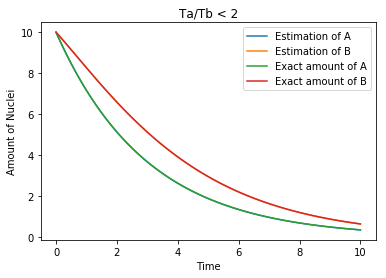

In [60]:
Ta = 3
Tb = 2

t_decay, N_array = rk(fnc3, 0.1, np.array([Na0,Nb0], float), 0, 10)

Na = []
Nb = []
for i in range(len(N_array)):
    Na.append(N_array[i][0])
    Nb.append(N_array[i][1])

plt.plot(t_decay, Na, linestyle = '-', label = 'Estimation of A')
plt.plot(t_decay, Nb, linestyle = '-', label = 'Estimation of B')

t_decay_exact = np.array(t_decay)
Na_exact = Na0*np.exp((-1/Ta)*t_decay_exact)
    
if(Ta == Tb):
    Nb_exact = (Na0/Tb)*t_decay_exact*np.exp((-1/Tb)*t_decay_exact) + Nb0*np.exp((-1/Tb)*t_decay_exact)
else:
    Nb_exact = ((Na0*Tb)/(Ta-Tb))*(np.exp((-1/Ta)*t_decay_exact)-np.exp((-1/Tb)*t_decay_exact)) + Nb0*np.exp((-1/Tb)*t_decay_exact)
    
plt.plot(t_decay_exact, Na_exact, linestyle = '-', label = 'Exact amount of A')
plt.plot(t_decay_exact, Nb_exact, linestyle = '-', label = 'Exact amount of B')

plt.xlabel('Time')
plt.ylabel('Amount of Nuclei')
plt.title('Ta/Tb < 2')
plt.legend(loc = 1)

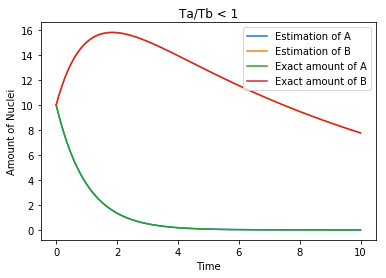

In [61]:
Ta = 1
Tb = 10

t_decay, N_array = rk(fnc3, 0.1, np.array([Na0,Nb0], float), 0, 10)

Na = []
Nb = []
for i in range(len(N_array)):
    Na.append(N_array[i][0])
    Nb.append(N_array[i][1])

plt.plot(t_decay, Na, linestyle = '-', label = 'Estimation of A')
plt.plot(t_decay, Nb, linestyle = '-', label = 'Estimation of B')

t_decay_exact = np.array(t_decay)
Na_exact = Na0*np.exp((-1/Ta)*t_decay_exact)
    
if(Ta == Tb):
    Nb_exact = (Na0/Tb)*t_decay_exact*np.exp((-1/Tb)*t_decay_exact) + Nb0*np.exp((-1/Tb)*t_decay_exact)
else:
    Nb_exact = ((Na0*Tb)/(Ta-Tb))*(np.exp((-1/Ta)*t_decay_exact)-np.exp((-1/Tb)*t_decay_exact)) + Nb0*np.exp((-1/Tb)*t_decay_exact)
    
plt.plot(t_decay_exact, Na_exact, linestyle = '-', label = 'Exact amount of A')
plt.plot(t_decay_exact, Nb_exact, linestyle = '-', label = 'Exact amount of B')

plt.xlabel('Time')
plt.ylabel('Amount of Nuclei')
plt.title('Ta/Tb < 1')
plt.legend(loc = 1)

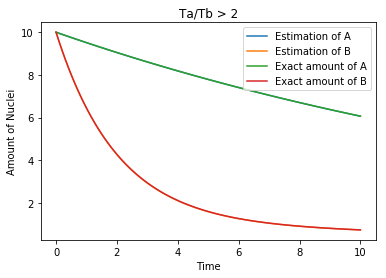

In [62]:
Ta = 20
Tb = 2

t_decay, N_array = rk(fnc3, 0.1, np.array([Na0,Nb0], float), 0, 10)

Na = []
Nb = []
for i in range(len(N_array)):
    Na.append(N_array[i][0])
    Nb.append(N_array[i][1])

plt.plot(t_decay, Na, linestyle = '-', label = 'Estimation of A')
plt.plot(t_decay, Nb, linestyle = '-', label = 'Estimation of B')

t_decay_exact = np.array(t_decay)
Na_exact = Na0*np.exp((-1/Ta)*t_decay_exact)
    
if(Ta == Tb):
    Nb_exact = (Na0/Tb)*t_decay_exact*np.exp((-1/Tb)*t_decay_exact) + Nb0*np.exp((-1/Tb)*t_decay_exact)
else:
    Nb_exact = ((Na0*Tb)/(Ta-Tb))*(np.exp((-1/Ta)*t_decay_exact)-np.exp((-1/Tb)*t_decay_exact)) + Nb0*np.exp((-1/Tb)*t_decay_exact)
    
plt.plot(t_decay_exact, Na_exact, linestyle = '-', label = 'Exact amount of A')
plt.plot(t_decay_exact, Nb_exact, linestyle = '-', label = 'Exact amount of B')

plt.xlabel('Time')
plt.ylabel('Amount of Nuclei')
plt.title('Ta/Tb > 2')
plt.legend(loc = 1)

Solving for Na is quite simple:
$$\frac{dN_{a}}{dt}=\frac{-N_{a}}{T_{a}}$$ since the EQ is seperable we move all N terms to the same size $$\frac{dN_{a}}{N_{a}}=\frac{-1}{T_{a}}dt$$ so intergrating we find $$ln(N_{a})=\frac{-t}{T_{a}}+c$$ so solving for N and substituting in initial values we find $$N_{a} = N_{a,0}e^{\frac{-t}{T_{a}}}$$

Substituting this value for Na into the slope of Nb we get: $$\frac{dN_{b}}{dt}=\frac{N_{a,0}}{T_{a}}e^{\frac{-t}{T_{a}}}-\frac{N_{b}}{T_{b}}$$ From there we move all Nb terms to the same side $$\frac{dN_{b}}{dt}+\frac{N_{b}}{T_{b}}=\frac{N_{a,0}}{T_{a}}e^{\frac{-t}{T_{a}}}$$ From there we recognize that by multiplying both sides by an integration factor the left side becomes an easy to solve derivative and the right is only defined by t: $$\frac{d}{dt}(N_{b}e^{\frac{t}{T_{b}}}) = e^{\frac{t}{T_{b}}}(\frac{dN_{b}}{dt}+\frac{N_{b}}{T_{b}}) = e^{\frac{t}{T_{b}}}\frac{N_{a,0}}{T_{a}}e^{\frac{-t}{T_{a}}} =\frac{N_{a,0}}{T_{a}}e^{\frac{t(T_{a}-T_{b})}{T_{a}T_{b}}} $$
Now we need to take into account two cases based on whether Ta and Tb are equal or not. Let's start with Ta and Tb not equal. Integrate both sides of the eq with repect to t. 
$$N_{b}e^{\frac{t}{T_{b}}} = \frac{N_{a,0}T_{b}}{T_{a}-T_{b}}e^{\frac{t(T_{a}-T_{b})}{T_{a}T_{b}}}+c$$
If we solve this eq for Nb and substitute in initial conditions we find:
$$N_{b} = \frac{N_{a,0}T_{b}}{T_{a}-T_{b}}(e^{\frac{-t}{T_{a}}}-e^{\frac{-t}{T_{b}}})+N_{b,0}e^{\frac{-t}{T_{b}}}$$

Now we look at the scenario where Ta = Tb. Going back to the step just before intergration we find that the equation is simplified: $$N_{b}e^{\frac{t}{T_{b}}} = \frac{N_{a,0}}{T_{a}}\int e^0dt = \frac{N_{a,0}t}{T_{a}}+ c$$ Thus by solving for Nb and taking into account inital conditions we find $$N_{b} = (\frac{N_{a,0}t}{T_{b}}+N_{b,0})e^{\frac{-t}{T_{b}}}$$


The estimation of the amount of nucleus A and nucleus B at a time t is quite accurate as can be seen from the graph, where the analytical solutions covers the estimation.

Since nuclei A decays into nuclei B interesting patterns emerge based on relative decay rate. If both start at the same value and $$\frac{T_{a}}{T_{b}}=2$$ then the two curves line up perfectly on top of one another. This is because though nuclei b decays faster than nuclei A, this difference is filled by the decay of nuclei A into nuclei B.

As Tb increases so that $$\frac{T_{a}}{T_{b}}<2$$ the two curves seperate and nuclei B decays at a slower rate, as now the rate of decay of nuclei B - rate of decay of A into B no longer keeps pace with the decay of A.

If we increase Tb relative to Ta even more we find that for $$\frac{T_{a}}{T_{b}}<1$$ the amount of nuclei B actually increases at first before then decreasing. This is due to the fact that A now decays faster than B so if there is a sufficient amount of A relative to B then A will be creating B faster than B is decaying. However since A will soon decay this production will stop and B's decay rate will overtake it causing the amount of B to fall.

If we go the otherway and instead make $$\frac{T_{a}}{T_{b}}>2$$ we see the opposite process happen. Nuclei A decays relatively slower, and thus nuclei B disappears faster as less of it is being made.


**Problem 4**

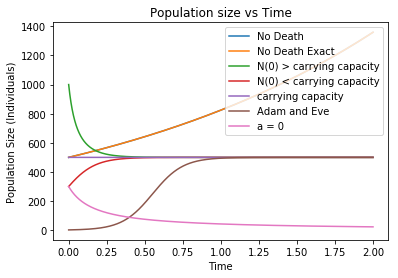

In [63]:
a = 0.5
b = 0
def fnc4(n,t):
    dn = a*n - b*(n**2)
    return dn

t_pop, n_pop = rk(fnc4, 0.0001, 500, 0, 2)
plt.plot(t_pop, n_pop,label = 'No Death')
t_pop_exact = np.array(t_pop)
n_pop_exact = 500*np.exp(a*t_pop)
plt.plot(t_pop_exact, n_pop_exact, label = 'No Death Exact')

a = 10
b = 0.02
t_pop, n_pop = rk(fnc4, 0.0001, 1000, 0, 2)
plt.plot(t_pop, n_pop, label = 'N(0) > carrying capacity')

t_pop, n_pop = rk(fnc4, 0.0001, 300, 0, 2)
plt.plot(t_pop, n_pop, label = 'N(0) < carrying capacity')

t_pop, n_pop = rk(fnc4, 0.0001, 500, 0, 2)
plt.plot(t_pop, n_pop, label = 'carrying capacity')

t_pop, n_pop = rk(fnc4, 0.0001, 2, 0, 2)
plt.plot(t_pop, n_pop, label = 'Adam and Eve')


a = 0
t_pop, n_pop = rk(fnc4, 0.0001, 300, 0, 2)
plt.plot(t_pop, n_pop, label = 'a = 0')

plt.title('Population size vs Time')
plt.xlabel('Time')
plt.ylabel('Population Size (Individuals)')
plt.legend(loc = 1)

For the no death graph we see that the population grows for all t, and that as time goes on the growth increases. Thus the population will increase without limit. We can also see that the no death exact mirrors our solution as they overlap. The analytical equation for no death is: $n = n_{0}e^{at}$

However once we intoduce death we see different behaviour. Instead of the population increasing to infinity as previous, or decreasing towards 0 as some might guess, the population heads to a horizontal asymptote predicted by a and b. Specifically the asymptote is at: $$N = \frac{a}{b}$$
This asymptote is called the carrying capacity of the environment, and is the value where individuals are born and die at the same rate, so population size is static. Using the equation for pop growth we can find this value: $$\frac{dN}{dt}=aN-bN^2 = bN(\frac{a}{b}-N)$$
Below the carrying capacity population growth is positive, above it is negative and when pop equals the carrying capacity it is 0. Therefore all functions of population growth (where there is an initial population) will approach this value. (Note: Adam and Eve starts at a pop of 2 causing the rate of population growth to accelerate then slow creating the squiggle) 

For a = 0 we see that the population dies out. This makes sense on two levels. First if people are dying but not being born then the population will disappear. Second if $\frac{a}{b}=0$ then the carrying capacity is 0.